In [ ]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt


def findCircles(accumulator, threshold, minRadius):

    threshold = int(threshold*np.max(accumulator))
    print(threshold)
    def findMax (array):
        max = np.unravel_index(np.argmax(array,axis=None), array.shape)
        # value = array[(np.unravel_index(np.argmax(array,axis=None), array.shape))]
        return (max)
    
    circle = []
    x = y = r = 0
    while accumulator[(findMax(accumulator))] > threshold:
        # accumulator[x,y,r)] = 0
        (x,y,r) = findMax(accumulator)
        circle.append((x,y,r))
        accumulator[(x,y,r)] = 0
        # for i in range(minRadius+1):
        #     for j in range(minRadius+1):
        #         if x-i < 0 or x+i > 99 or y-j < 0 or y+j > 99:
        #             accumulator[x,y,r] = 0
        #         else:
        #             accumulator[(x-i, y -j, r)] = 0
        #             accumulator[(x+i, y +j, r)] = 0
#     print(np.max(accumulator))
    return circle

imgfile = 'images/test2_100.jpg'

image = cv2.imread(imgfile)
output = image.copy()
imgBlur = cv2.medianBlur(image, 5)
gray = cv2.cvtColor(imgBlur,cv2.COLOR_BGR2GRAY)
# print(image)
# imagegray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)




# implementation based on OpenCV HoughCircles algorithm

# circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT,1,5, param1 = 50, param2 = 30)

# print(circles)

# if circles is not None:
#     circles = np.round(circles[0, :]).astype("int")

#     for (x, y, r) in circles:
#         cv2.circle(output, (x,y), r, (0, 0,255), 2)
#         # cv2.rectangle(output, ?)



# implementation using custom algorithm


edges = cv2.Canny(gray,30,50)
[ximg,yimg] = np.nonzero(edges)
edgePts = np.vstack([ximg,yimg]).T

# print(edgePts)
xMax = gray.shape[0]
yMax = gray.shape[1]
rMax = int(math.sqrt((xMax)**2 + (yMax)**2)) 
threshold = .7
# print(rMax)
acc = np.zeros((xMax,yMax,rMax), dtype = int)

# print(acc[0,0,0])

# acc[0,0,0] = 1

print(acc.shape)

for i in edgePts:
    for a in range(xMax):
        for b in range(yMax):
            r = int(math.sqrt((i[0] - a)**2 + (i[1] - b)**2))
            acc[a,b,r] += 1

# print(np.sort(acc, axis=None)[-1])
# circle = []
results = findCircles(acc,threshold, 5)

if results is not None:
    # circles = np.round(circles[0, :]).astype("int")

    for (x, y, r) in results:
        cv2.circle(output, (y,x), r, (0, 0,255), 2)


print(np.unravel_index(np.argmax(acc,axis=None), acc.shape))
plt.imshow(acc[:,:,20], cmap="gray")
plt.show()

In [17]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt


def findCircles(accumulator, threshold, minRadius):

    threshold = int(threshold*np.max(accumulator))
    print(threshold)
    def findMax (array):
        max = np.unravel_index(np.argmax(array,axis=None), array.shape)
        # value = array[(np.unravel_index(np.argmax(array,axis=None), array.shape))]
        return (max)
    
    circle = []
    x = y = r = 0
    while accumulator[(findMax(accumulator))] > threshold:
        # accumulator[x,y,r)] = 0
        (x,y,r) = findMax(accumulator)
        circle.append((x,y,r))
        accumulator[(x,y,r)] = 0
        # for i in range(minRadius+1):
        #     for j in range(minRadius+1):
        #         if x-i < 0 or x+i > 99 or y-j < 0 or y+j > 99:
        #             accumulator[x,y,r] = 0
        #         else:
        #             accumulator[(x-i, y -j, r)] = 0
        #             accumulator[(x+i, y +j, r)] = 0
#     print(np.max(accumulator))
    return circle

imgfile = 'images/one.jpg'

image = cv2.imread(imgfile)
output = image.copy()
imgBlur = cv2.medianBlur(image, 5)
gray = cv2.cvtColor(imgBlur,cv2.COLOR_BGR2GRAY)
# print(image)
# imagegray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)




# implementation based on OpenCV HoughCircles algorithm

# circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT,1,5, param1 = 50, param2 = 30)

# print(circles)

# if circles is not None:
#     circles = np.round(circles[0, :]).astype("int")

#     for (x, y, r) in circles:
#         cv2.circle(output, (x,y), r, (0, 0,255), 2)
#         # cv2.rectangle(output, ?)



# implementation using custom algorithm


edges = cv2.Canny(gray,30,50)
[ximg,yimg] = np.nonzero(edges)
edgePts = np.vstack([ximg,yimg]).T

# print(edgePts)

rMax = int(math.sqrt((gray.shape[0])**2 + (gray.shape[1])**2))
aMax = gray.shape[0]
bMax = gray.shape[1]
# yMax = gray.shape[1]
# print(rMax)
thetaStep = 360 # stepsize in degrees
threshold = .7
# print(rMax)
acc = np.zeros((aMax,bMax,rMax), dtype = int)

# print(acc[0,0,0])

# acc[0,0,0] = 1

print(acc.shape)
# acc = defaultdict(int)
for i in edgePts:
#     print(i)
    for r in range(5, int(rMax)):
#         print(r)
        for angle in range(thetaStep):
            a = i[0] - int(r - np.cos(angle*np.pi/180))
            b = i[1] - int(r - np.sin(angle*np.pi/180))
            if a >=0 and a < aMax and b>=0 and b < bMax:
                acc[(a,b,r)] += 1
#                 print(a,b,r)
# print(np.sort(acc, axis=None)[-1])
# print(np.unravel_index(np.argmax(acc,axis=None), acc.shape))

# circle = []
# results = findCircles(acc,threshold, 5)

# if results is not None:
#     # circles = np.round(circles[0, :]).astype("int")

#     for (x, y, r) in results:
#         cv2.circle(output, (y,x), r, (0, 0,255), 2)


# print(np.unravel_index(np.argmax(acc,axis=None), acc.shape))
# plt.imshow(acc[:,:,100], cmap="gray")
# plt.show()

(100, 100, 141)


(0, 1, 128)
41
269
(100, 100, 141)


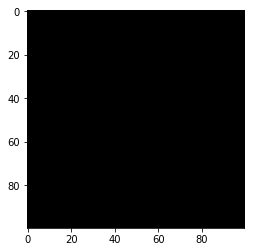

In [40]:
print(np.unravel_index(np.amax(acc,axis=None), acc.shape))
print(np.argmax(acc,axis=None))
print((np.sort(acc, axis=None)[-1]))
plt.imshow(acc[:,:,127], cmap="gray")
# plt.show()
print(acc.shape)

In [35]:
print(np.amax(acc))

269
